In [13]:
import os

model_path = os.path.expanduser("~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/results/logs/CatBoost_model.pkl")

if os.path.exists(model_path):
    print(f"✅ Model found at {model_path}")
else:
    print(f"❌ Model file NOT found at {model_path}")


✅ Model found at /Users/khalilmosbah/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/results/logs/CatBoost_model.pkl


✅ Model loaded successfully from /Users/khalilmosbah/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/results/logs/CatBoost_model.pkl


,Feature,Importance
5,SessionsPerWeek,34.584161
6,AvgSessionDurationMinutes,29.228702
8,AchievementsUnlocked,8.154441
7,PlayerLevel,8.012470
2,PlayTimeHours,5.427431
0,Age,5.263419
4,GameDifficulty,2.065555
9,Location_Europe,1.012032
1,Gender,0.948641
13,Genre_Simulation,0.884318


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_20824/1792714577.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


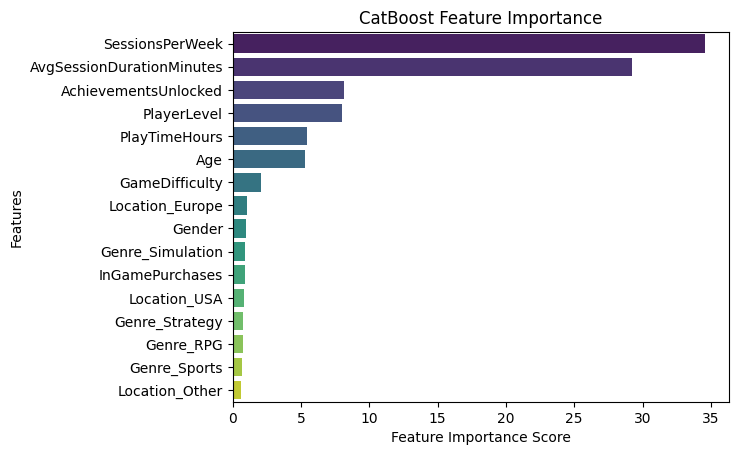

In [19]:
#Feature importance
#catboost
import seaborn as sns
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt

X_train = pd.read_csv('~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/Data/processed/x_train_online_gaming_behavior_dataset.csv')
model_path = os.path.expanduser("~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/results/logs/CatBoost_model.pkl")

# Load the model
model = joblib.load(model_path)

print(f"✅ Model loaded successfully from {model_path}")

# Get feature importance
catboost_importance = model.get_feature_importance()

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': catboost_importance
}).sort_values(by="Importance", ascending=False)

# Display results
display(feature_importance_df)

sns.barplot(
    x="Importance", 
    y="Feature", 
    data=feature_importance_df,
    palette="viridis"
)

# Add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")

# Show plot
plt.show()

SHAP values type: <class 'numpy.ndarray'>
SHAP values shape before processing: (32027, 16, 3)
Feature count: 16
SHAP values shape after processing: (32027, 16)


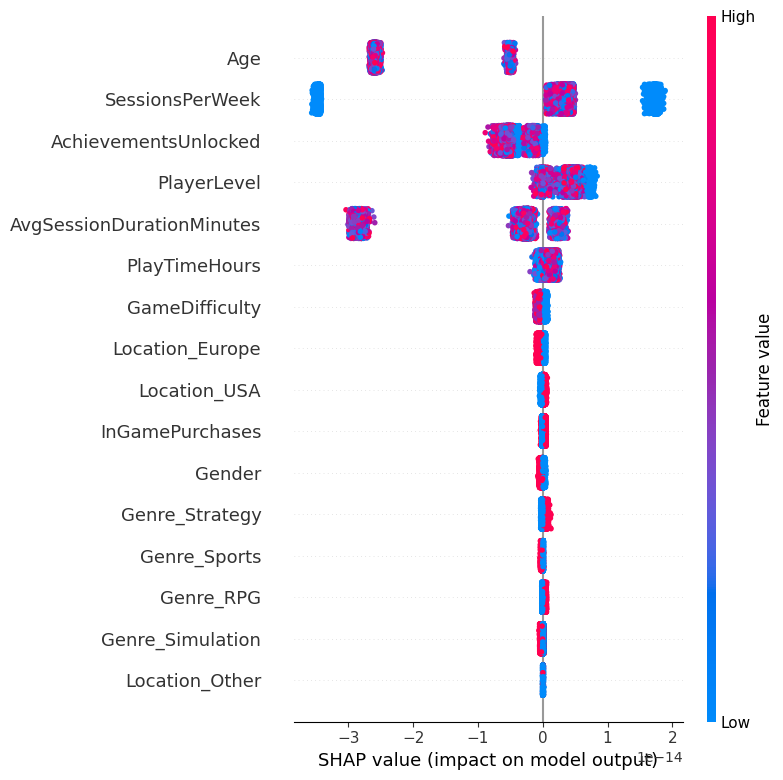

SHAP importance shape: (16, 2)


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_22000/1133915053.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SHAP Value", y="Feature", data=shap_importance, palette="coolwarm")


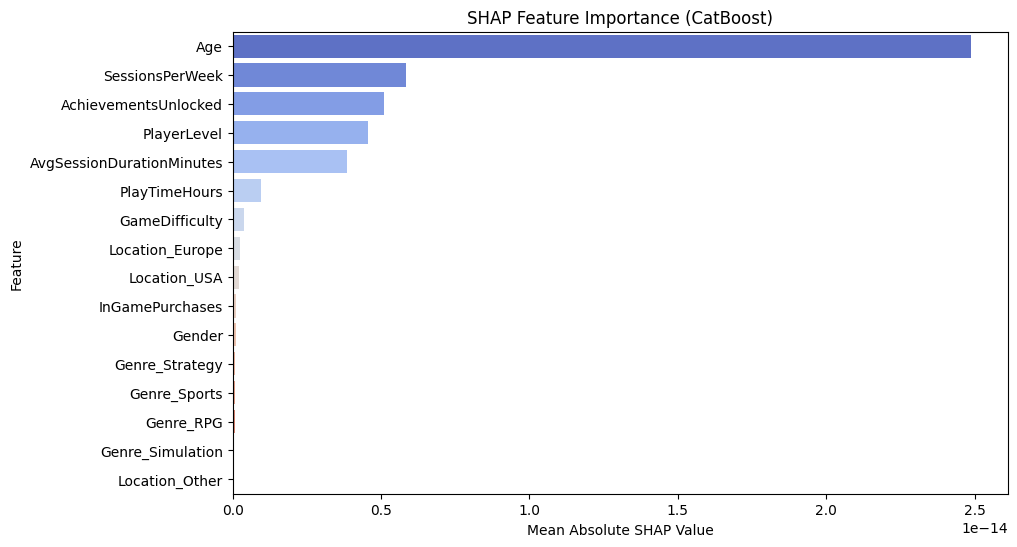

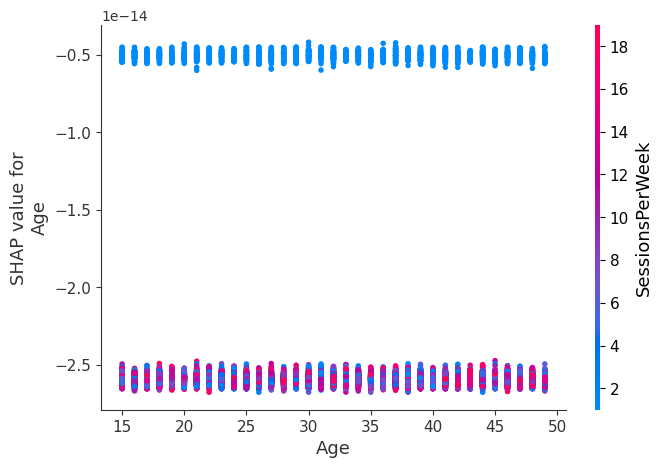

In [10]:
import shap
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

# Load processed data
X_train = pd.read_csv('~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/Data/processed/x_train_online_gaming_behavior_dataset.csv')

# Load trained CatBoost model
model_path = os.path.expanduser("~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/results/logs/CatBoost_model.pkl")
model = joblib.load(model_path)

# Ensure X_train is a DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# ✅ Use SHAP TreeExplainer for CatBoost
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# 📌 Debugging Output: Check SHAP Value Shape
print("SHAP values type:", type(shap_values))
print("SHAP values shape before processing:", np.array(shap_values).shape)
print("Feature count:", len(X_train.columns))

# ✅ Fix for Multi-Class SHAP Output
if shap_values.ndim == 3:  # (samples, features, classes)
    shap_values = shap_values.mean(axis=2)  # Aggregate over the 3 classes

# 📌 Verify SHAP Values Match Feature Count
print("SHAP values shape after processing:", shap_values.shape)

# 📌 SHAP Summary Plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_train)

# 📌 SHAP Bar Chart (Fixed)
shap_values_mean = np.abs(shap_values).mean(axis=0)  # Ensure correct shape
shap_importance = pd.DataFrame({"Feature": X_train.columns, "SHAP Value": shap_values_mean})

# Ensure correct length before sorting
print("SHAP importance shape:", shap_importance.shape)

shap_importance = shap_importance.sort_values(by="SHAP Value", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="SHAP Value", y="Feature", data=shap_importance, palette="coolwarm")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance (CatBoost)")
plt.show()

# 📌 Generate Dependence Plot for Key Features
top_feature = shap_importance.iloc[0]["Feature"]
shap.dependence_plot(top_feature, shap_values, X_train)

